In [1]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

Cloning into 'ML-Bootcamp'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 425 (delta 100), reused 152 (delta 65), pack-reused 193
Receiving objects: 100% (425/425), 8.68 MiB | 7.98 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [2]:
!pip install wordcloud

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("/content/ML-Bootcamp/Week-3/Day-1/Dataset/SMSSpamCollection.txt", sep ="\t", names = ['labels', 'text'])
df

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.shape

(5572, 2)

# **Data** **Cleaning**

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
sn = SnowballStemmer("english")
stop = set(stopwords.words("english"))

In [66]:
def clean_text(sms):
  sms = sms.lower()
  sms = re.sub("[^a-z]", ' ', sms)
  sms = nltk.word_tokenize(sms)
  sms = [t for t in sms if len(t)>1]
  sms = [sn.stem(word) for word in sms if word not in stop]
  sms = ' '.join(sms)
  return sms

In [74]:
clean_text("Get this stuff for free just Rs 10/-")

'get stuff free rs'

In [75]:
df['clean_text'] = df['text'].apply(clean_text)

In [76]:
df.head()

,labels,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


**Wordcloud**

In [77]:
from wordcloud import WordCloud

In [78]:
hamdata = df[df['labels'] == 'ham']

hamdata = hamdata['clean_text']

In [79]:
def wordcloud(data):
  words = ''.join(data)
  wc = WordCloud(background_color='white')
  wc = wc.generate(words)
  plt.figure(figsize= (10,8))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

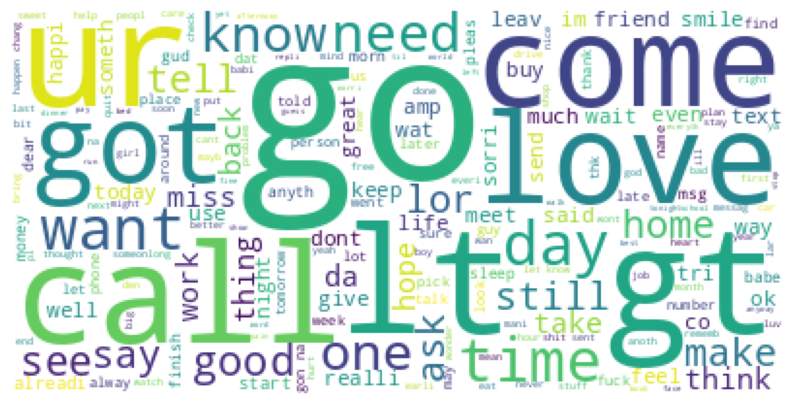

In [80]:
wordcloud(hamdata)

In [81]:
spamdata = df[df['labels'] == 'spam']

spamdata = spamdata['clean_text']

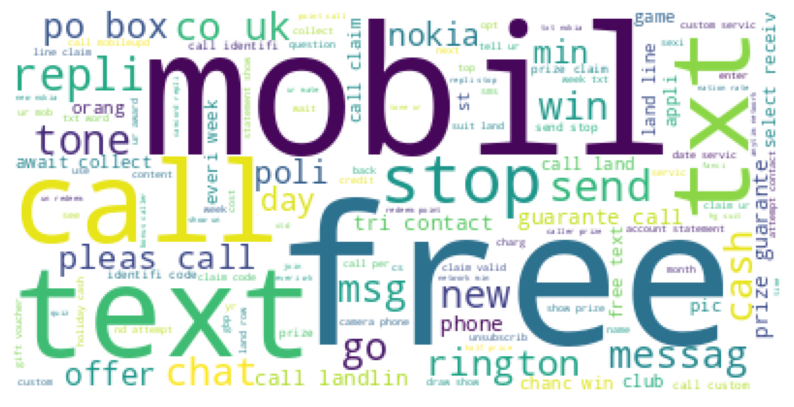

In [82]:
wordCloud(spamdata)

**Featurization**

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
cv = CountVectorizer()

In [85]:
X = cv.fit_transform(df['clean_text']).toarray()

In [86]:
X.shape

(5572, 6288)

In [88]:
y = pd.get_dummies(df['labels'])
y =y['spam'].values

In [89]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

**Model** **Building**

In [90]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [93]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
model = MultinomialNB()

In [95]:
model.fit(X_train, y_train)

MultinomialNB()

In [96]:
y_pred = model.predict(X_test)

In [97]:
y_test,y_pred

(array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8))

In [98]:
pd.DataFrame({'Acctual': y_test,'predicted': y_pred}).head(10)

,Acctual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


**Evaluation**

In [100]:
print("Accuaracy on training data :")
print(model.score(X_train,y_train))

Accuaracy on training data :
0.99196356817573


In [101]:
print("Accuracy on testing data:")
print(model.score(X_test,y_test))

Accuracy on testing data:
0.9798803697661773
